## Import libraries

In [1]:
! pip install sweetviz

     |████████████████████████████████| 15.1 MB 6.9 MB/s 


In [2]:
! pip install dython

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import sweetviz as sv
import matplotlib.pyplot as plt
from dython.nominal import associations
from pandas_profiling import ProfileReport

## Get datasets basic info

**Observation**: NaN values present in below columns in both train and test datasets

* region_category
* preferred_offer_types
* points_in_wallet


In [4]:
train_df = pd.read_csv("../input/customer-churn-rate-prediction/dataset/train.csv")
train_df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [5]:
train_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [6]:
train_df[train_df.duplicated()].count()

customer_id                     0
Name                            0
age                             0
gender                          0
security_no                     0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
referral_id                     0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

In [7]:
test_df = pd.read_csv("../input/customer-churn-rate-prediction/dataset/test.csv")
test_df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,fffe43004900440031003700300030003400,Alethia Meints,50,F,OQJ1XAY,Village,Premium Membership,2015-11-02,No,xxxxxxxx,...,12,386.26,40721.44,7.0,733.830000,Yes,No,No,Not Applicable,Poor Product Quality
1,fffe43004900440031003900370037003300,Ming Lopez,41,M,OUQRPKO,Village,Gold Membership,2016-03-01,No,xxxxxxxx,...,11,37.80,9644.40,9.0,726.000000,Yes,No,No,Not Applicable,Poor Website
2,fffe43004900440034003800360037003000,Carina Flannigan,31,F,02J2RE7,Town,Silver Membership,2017-03-03,No,xxxxxxxx,...,18,215.36,3693.25,21.0,713.780000,Yes,No,Yes,Solved in Follow-up,No reason specified
3,fffe43004900440036003200370033003400,Kyung Wanner,64,M,5YEQIF1,Town,Silver Membership,2017-08-18,Yes,CID8941,...,-999,44.57,36809.56,11.0,744.970000,Yes,No,Yes,No Information Available,Too many ads
4,fffe43004900440035003000370031003900,Enola Gatto,16,F,100RYB5,Town,No Membership,2015-05-05,Yes,CID5690,...,6,349.88,40675.86,8.0,299.048351,No,Yes,Yes,Solved in Follow-up,Poor Website


In [8]:
test_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19919 entries, 0 to 19918
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   19919 non-null  object 
 1   Name                          19919 non-null  object 
 2   age                           19919 non-null  int64  
 3   gender                        19919 non-null  object 
 4   security_no                   19919 non-null  object 
 5   region_category               16971 non-null  object 
 6   membership_category           19919 non-null  object 
 7   joining_date                  19919 non-null  object 
 8   joined_through_referral       19919 non-null  object 
 9   referral_id                   19919 non-null  object 
 10  preferred_offer_types         19760 non-null  object 
 11  medium_of_operation           19919 non-null  object 
 12  internet_option               19919 non-null  object 
 13  l

In [9]:
test_df[test_df.duplicated()].count()

customer_id                     0
Name                            0
age                             0
gender                          0
security_no                     0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
referral_id                     0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
dtype: int64

## Feature-wise EDA

### Name

In [10]:
train_df['First_Name'] = train_df['Name'].apply(lambda x: x.split()[0].lower())
train_df['Last_Name'] = train_df['Name'].apply(lambda x: x.split()[1].lower())

train_df['num_chars_fn'] = train_df['First_Name'].apply(lambda x: len(x))
train_df['num_chars_ln'] = train_df['Last_Name'].apply(lambda x: len(x))

train_df['num_vowels_fn'] = train_df['First_Name'].apply(lambda x: len([v for v in x if v in ['a','e','i','o','u']]))
train_df['num_vowels_ln'] = train_df['Last_Name'].apply(lambda x: len([v for v in x if v in ['a','e','i','o','u']]))

train_df['num_consonants_fn'] = train_df['First_Name'].apply(lambda x: len([v for v in x if v not in ['a','e','i','o','u']]))
train_df['num_consonants_ln'] = train_df['Last_Name'].apply(lambda x: len([v for v in x if v not in ['a','e','i','o','u']]))

train_df.drop(['Name','First_Name','Last_Name'], axis=1, inplace=True)

In [11]:
test_df['First_Name'] = test_df['Name'].apply(lambda x: x.split()[0].lower())
test_df['Last_Name'] = test_df['Name'].apply(lambda x: x.split()[1].lower())

test_df['num_chars_fn'] = test_df['First_Name'].apply(lambda x: len(x))
test_df['num_chars_ln'] = test_df['Last_Name'].apply(lambda x: len(x))

test_df['num_vowels_fn'] = test_df['First_Name'].apply(lambda x: len([v for v in x if v in ['a','e','i','o','u']]))
test_df['num_vowels_ln'] = test_df['Last_Name'].apply(lambda x: len([v for v in x if v in ['a','e','i','o','u']]))

test_df['num_consonants_fn'] = test_df['First_Name'].apply(lambda x: len([v for v in x if v not in ['a','e','i','o','u']]))
test_df['num_consonants_ln'] = test_df['Last_Name'].apply(lambda x: len([v for v in x if v not in ['a','e','i','o','u']]))

test_df.drop(['Name','First_Name','Last_Name'], axis=1, inplace=True)

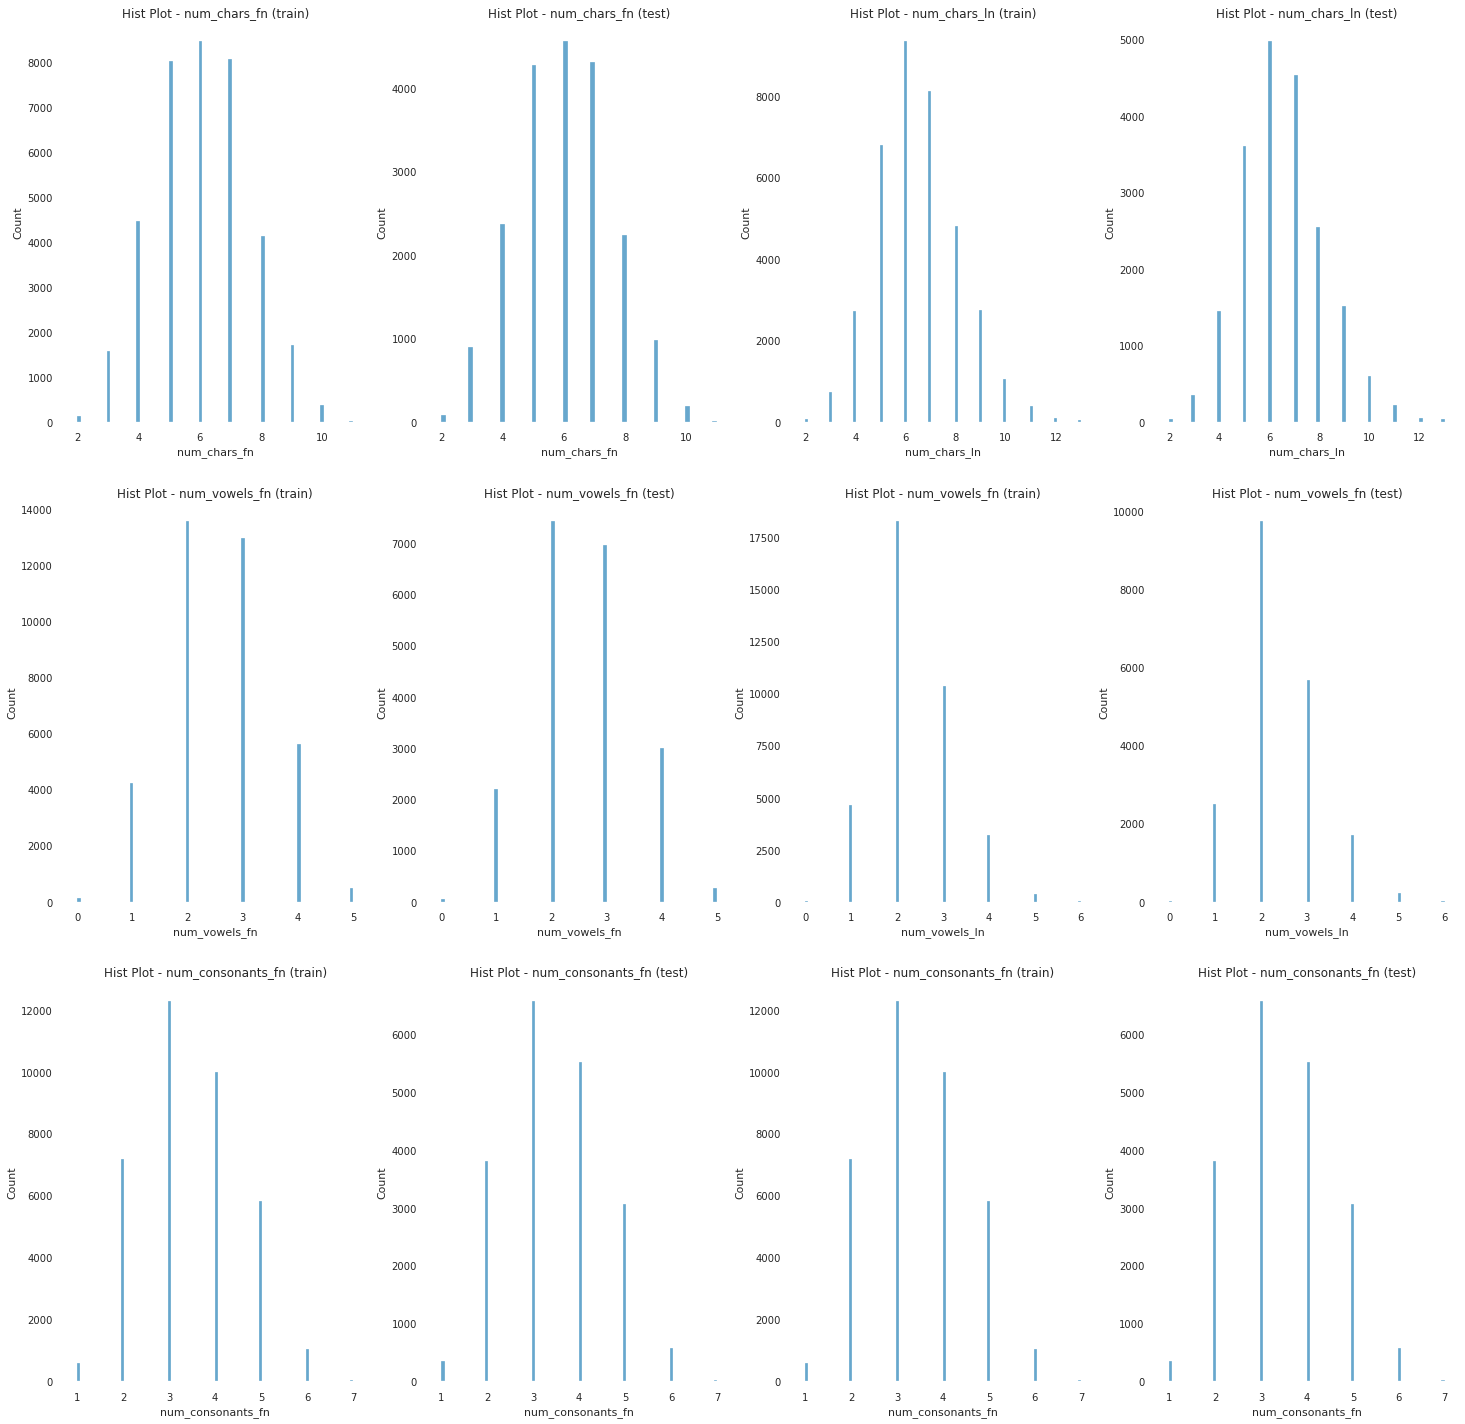

In [12]:
_, ax = plt.subplots(3, 4, figsize=(25, 25))
sns.histplot(x='num_chars_fn', data=train_df, ax=ax[0][0]);ax[0][0].title.set_text('Hist Plot - num_chars_fn (train)');
sns.histplot(x='num_chars_fn', data=test_df, ax=ax[0][1]);ax[0][1].title.set_text('Hist Plot - num_chars_fn (test)');
sns.histplot(x='num_chars_ln', data=train_df, ax=ax[0][2]);ax[0][2].title.set_text('Hist Plot - num_chars_ln (train)');
sns.histplot(x='num_chars_ln', data=test_df, ax=ax[0][3]);ax[0][3].title.set_text('Hist Plot - num_chars_ln (test)');

sns.histplot(x='num_vowels_fn', data=train_df, ax=ax[1][0]);ax[1][0].title.set_text('Hist Plot - num_vowels_fn (train)');
sns.histplot(x='num_vowels_fn', data=test_df, ax=ax[1][1]);ax[1][1].title.set_text('Hist Plot - num_vowels_fn (test)');
sns.histplot(x='num_vowels_ln', data=train_df, ax=ax[1][2]);ax[1][2].title.set_text('Hist Plot - num_vowels_fn (train)');
sns.histplot(x='num_vowels_ln', data=test_df, ax=ax[1][3]);ax[1][3].title.set_text('Hist Plot - num_vowels_fn (test)');

sns.histplot(x='num_consonants_fn', data=train_df, ax=ax[2][0]);ax[2][0].title.set_text('Hist Plot - num_consonants_fn (train)');
sns.histplot(x='num_consonants_fn', data=test_df, ax=ax[2][1]);ax[2][1].title.set_text('Hist Plot - num_consonants_fn (test)');
sns.histplot(x='num_consonants_fn', data=train_df, ax=ax[2][2]);ax[2][2].title.set_text('Hist Plot - num_consonants_fn (train)');
sns.histplot(x='num_consonants_fn', data=test_df, ax=ax[2][3]);ax[2][3].title.set_text('Hist Plot - num_consonants_fn (test)');


### age

**Note**: Age values can be bucketed into below groups

* Age <=19 --> Teenagers
* Age between 20 and 40
* Age between 41 and 60
* Age > 60 --> Senior citizens

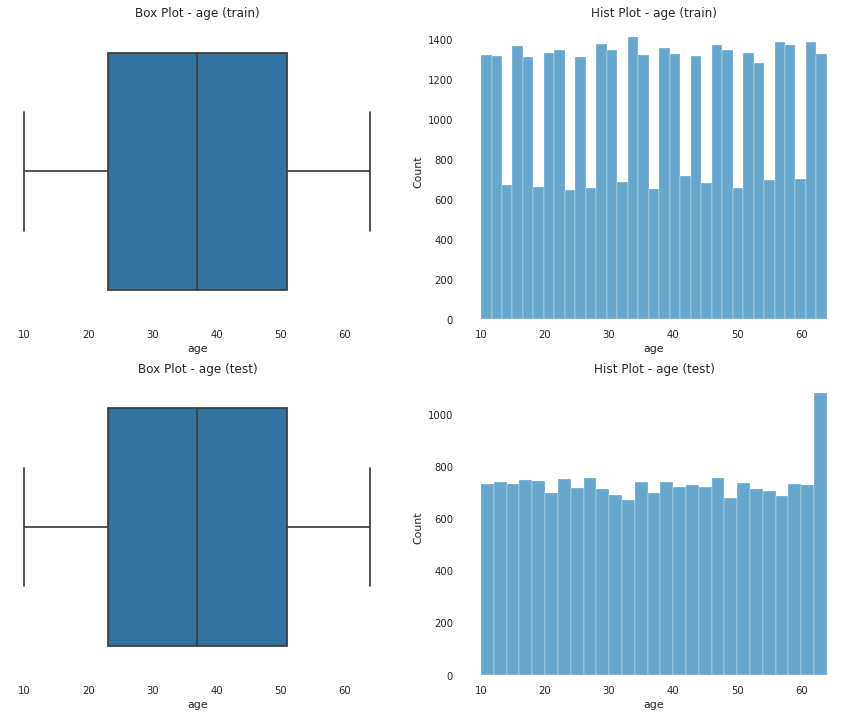

In [13]:
x1 = train_df['age']
x2 = test_df['age']

_, ax = plt.subplots(2, 2, figsize=(15, 12))
sns.boxplot(x=x1, ax=ax[0][0]); ax[0][0].title.set_text('Box Plot - age (train)');
sns.histplot(x=x1, ax=ax[0][1]); ax[0][1].title.set_text('Hist Plot - age (train)');
sns.boxplot(x=x2, ax=ax[1][0]); ax[1][0].title.set_text('Box Plot - age (test)');
sns.histplot(x=x2, ax=ax[1][1]); ax[1][1].title.set_text('Hist Plot - age (test)');

In [14]:
def age_bins(x):
    if x <= 19:
        return '<=19'
    elif x > 19 and x <= 40:
        return '>19 & <=40'
    elif x > 40 and x <= 60:
        return '>40 & <=60'
    elif x > 60:
        return '>60'

train_df['age_category'] = train_df['age'].apply(age_bins)
test_df['age_category'] = test_df['age'].apply(age_bins)

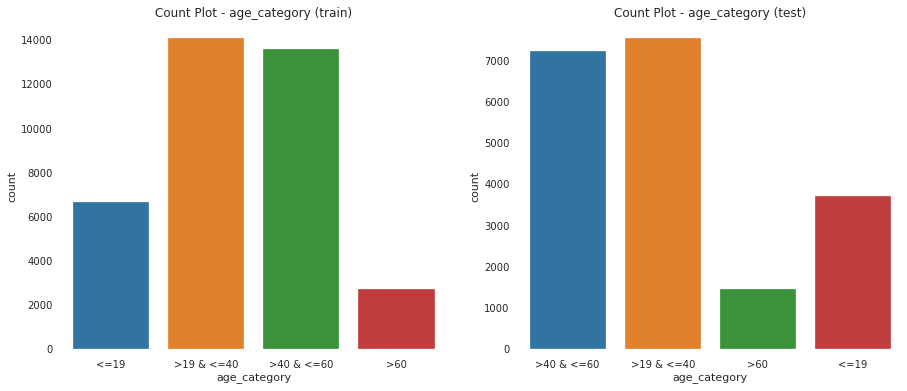

In [15]:
_, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.countplot(x='age_category', data=train_df, ax=ax[0]); ax[0].title.set_text('Count Plot - age_category (train)');
sns.countplot(x='age_category', data=test_df, ax=ax[1]); ax[1].title.set_text('Count Plot - age_category (test)');

### gender

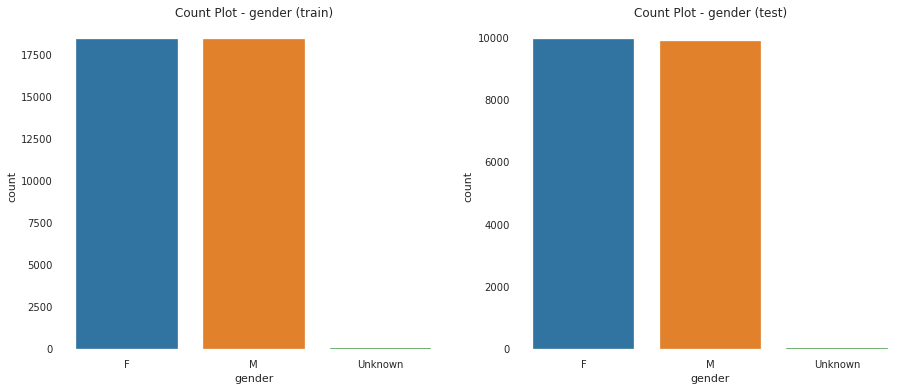

In [16]:
_, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.countplot(x='gender', data=train_df, ax=ax[0]); ax[0].title.set_text('Count Plot - gender (train)');
sns.countplot(x='gender', data=test_df, ax=ax[1]); ax[1].title.set_text('Count Plot - gender (test)');

In [17]:
train_df.groupby(['gender']).size().reset_index().rename(columns={0:'count'})

,gender,count
0,F,18490
1,M,18443
2,Unknown,59


In [18]:
test_df.groupby(['gender']).size().reset_index().rename(columns={0:'count'})

,gender,count
0,F,9972
1,M,9911
2,Unknown,36


### security_no

In [19]:
train_df['security_no'] = train_df['security_no'].apply(lambda x: x.lower())
train_df['num_chars_sn'] = train_df['security_no'].apply(lambda x: len(x))
train_df['num_vowels_sn'] = train_df['security_no'].apply(lambda x: len([v for v in x if v in ['a','e','i','o','u']]))
train_df['num_consonants_sn'] = train_df['security_no'].apply(lambda x: len([v for v in x if v not in ['a','e','i','o','u']]))

train_df.drop(['security_no'], axis=1, inplace=True)

In [20]:
test_df['security_no'] = test_df['security_no'].apply(lambda x: x.lower())
test_df['num_chars_sn'] = test_df['security_no'].apply(lambda x: len(x))
test_df['num_vowels_sn'] = test_df['security_no'].apply(lambda x: len([v for v in x if v in ['a','e','i','o','u']]))
test_df['num_consonants_sn'] = test_df['security_no'].apply(lambda x: len([v for v in x if v not in ['a','e','i','o','u']]))

test_df.drop(['security_no'], axis=1, inplace=True)

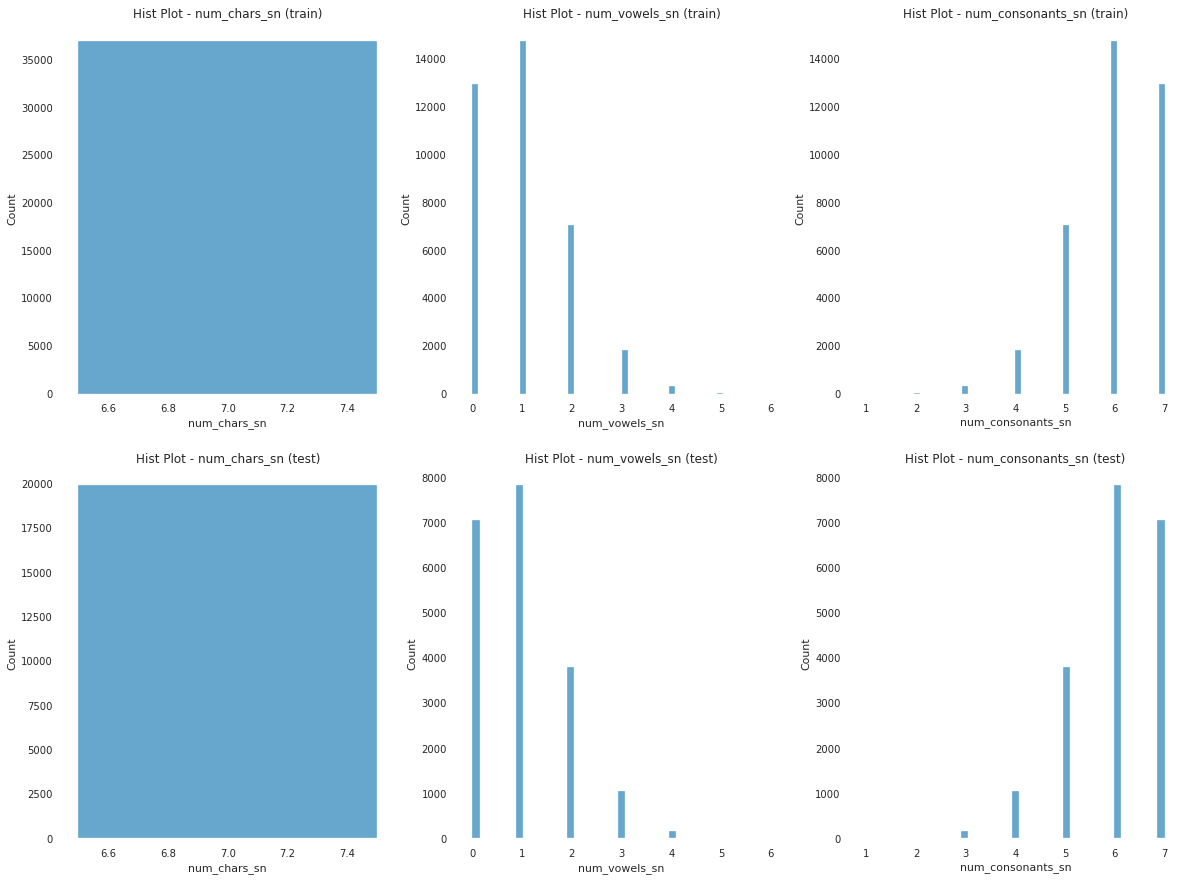

In [21]:
_, ax = plt.subplots(2, 3, figsize=(20, 15))
sns.histplot(x='num_chars_sn', data=train_df, ax=ax[0][0]);ax[0][0].title.set_text('Hist Plot - num_chars_sn (train)');
sns.histplot(x='num_vowels_sn', data=train_df, ax=ax[0][1]);ax[0][1].title.set_text('Hist Plot - num_vowels_sn (train)');
sns.histplot(x='num_consonants_sn', data=train_df, ax=ax[0][2]);ax[0][2].title.set_text('Hist Plot - num_consonants_sn (train)');
sns.histplot(x='num_chars_sn', data=test_df, ax=ax[1][0]);ax[1][0].title.set_text('Hist Plot - num_chars_sn (test)');
sns.histplot(x='num_vowels_sn', data=test_df, ax=ax[1][1]);ax[1][1].title.set_text('Hist Plot - num_vowels_sn (test)');
sns.histplot(x='num_consonants_sn', data=test_df, ax=ax[1][2]);ax[1][2].title.set_text('Hist Plot - num_consonants_sn (test)');

### region_category

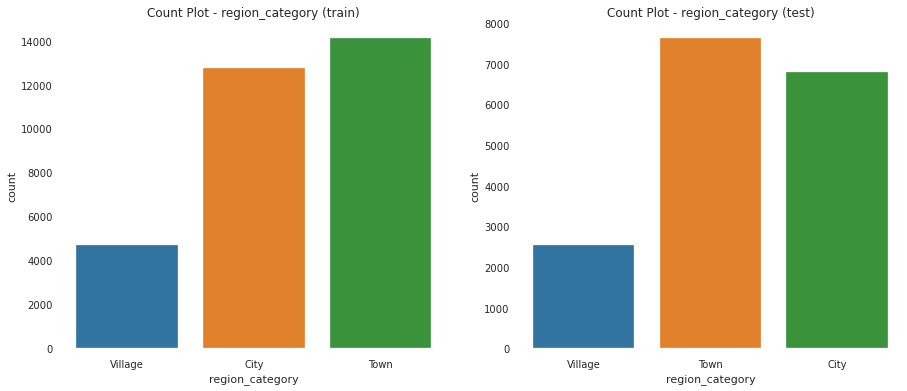

In [22]:
_, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.countplot(x='region_category', data=train_df, ax=ax[0]); ax[0].title.set_text('Count Plot - region_category (train)');
sns.countplot(x='region_category', data=test_df, ax=ax[1]); ax[1].title.set_text('Count Plot - region_category (test)');

### membership_category

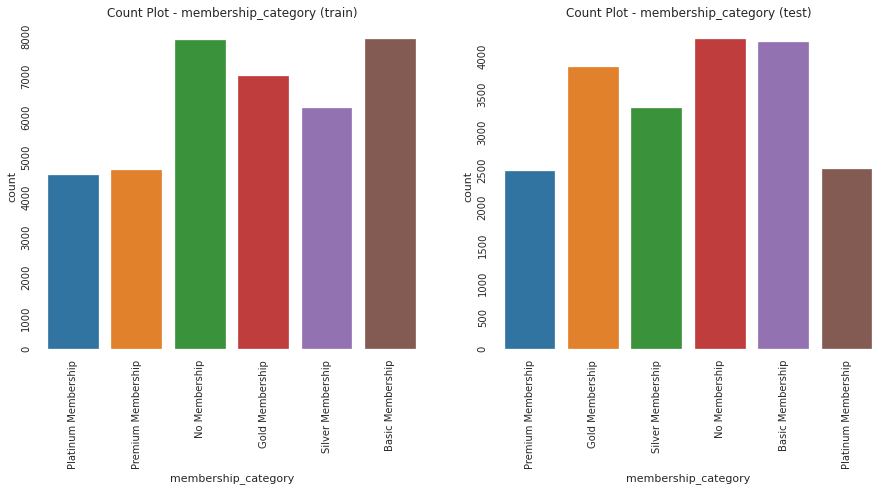

In [23]:
_, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.countplot(x='membership_category', data=train_df, ax=ax[0]); ax[0].title.set_text('Count Plot - membership_category (train)');
sns.countplot(x='membership_category', data=test_df, ax=ax[1]); ax[1].title.set_text('Count Plot - membership_category (test)');
ax[0].tick_params(labelrotation=90)
ax[1].tick_params(labelrotation=90)

### joining_date

In [24]:
train_df['joining_year'] = train_df['joining_date'].map(lambda x: pd.to_datetime(x).year)
train_df['joining_month'] = train_df['joining_date'].map(lambda x: pd.to_datetime(x).month)
train_df['joining_day'] = train_df['joining_date'].map(lambda x: pd.to_datetime(x).day)

test_df['joining_year'] = test_df['joining_date'].map(lambda x: pd.to_datetime(x).year)
test_df['joining_month'] = test_df['joining_date'].map(lambda x: pd.to_datetime(x).month)
test_df['joining_day'] = test_df['joining_date'].map(lambda x: pd.to_datetime(x).day)

train_df['joining_year'] = train_df['joining_year'].astype(str)
train_df['joining_month'] = train_df['joining_month'].astype(str)
train_df['joining_day'] = train_df['joining_day'].astype(str)

test_df['joining_year'] = test_df['joining_year'].astype(str)
test_df['joining_month'] = test_df['joining_month'].astype(str)
test_df['joining_day'] = test_df['joining_day'].astype(str)

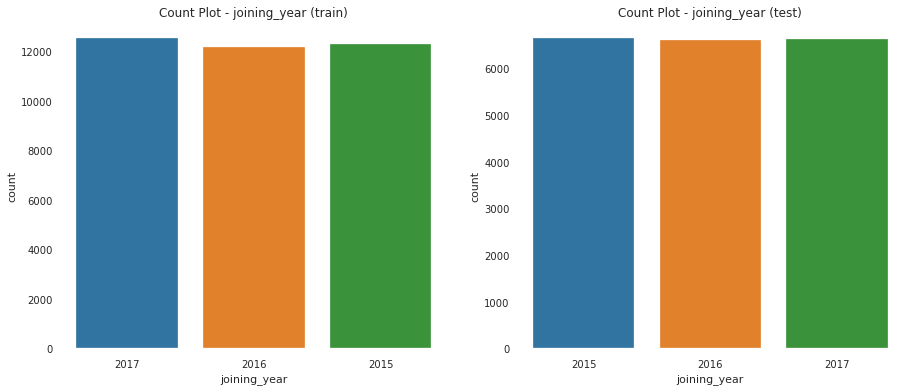

In [25]:
_, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.countplot(x='joining_year', data=train_df, ax=ax[0]); ax[0].title.set_text('Count Plot - joining_year (train)');
sns.countplot(x='joining_year', data=test_df, ax=ax[1]); ax[1].title.set_text('Count Plot - joining_year (test)');

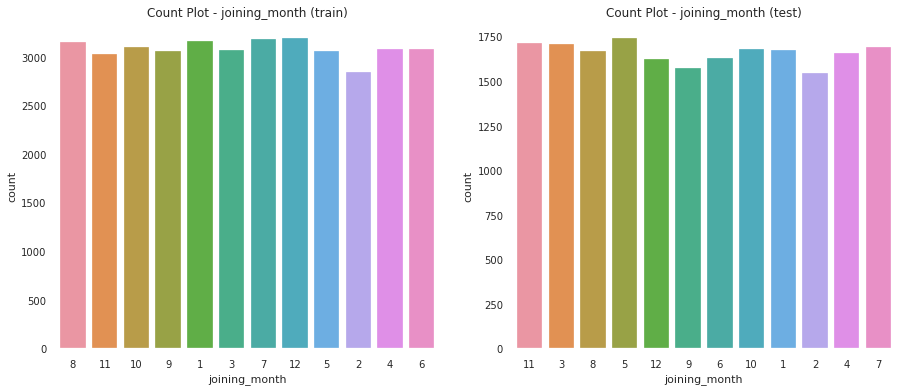

In [26]:
_, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.countplot(x='joining_month', data=train_df, ax=ax[0]); ax[0].title.set_text('Count Plot - joining_month (train)');
sns.countplot(x='joining_month', data=test_df, ax=ax[1]); ax[1].title.set_text('Count Plot - joining_month (test)');

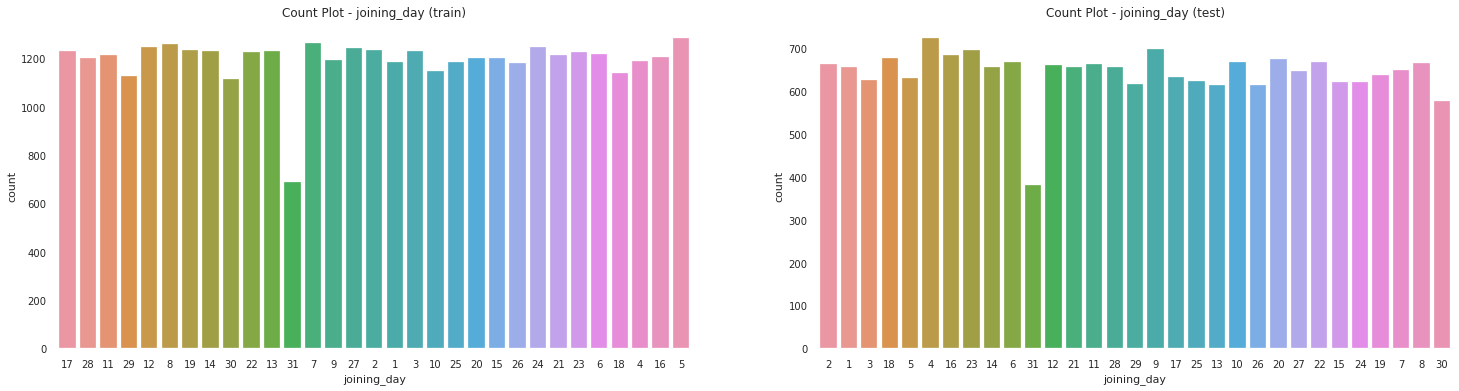

In [27]:
_, ax = plt.subplots(1, 2, figsize=(25, 6))
sns.countplot(x='joining_day', data=train_df, ax=ax[0]); ax[0].title.set_text('Count Plot - joining_day (train)');
sns.countplot(x='joining_day', data=test_df, ax=ax[1]); ax[1].title.set_text('Count Plot - joining_day (test)');

### joined_through_referral

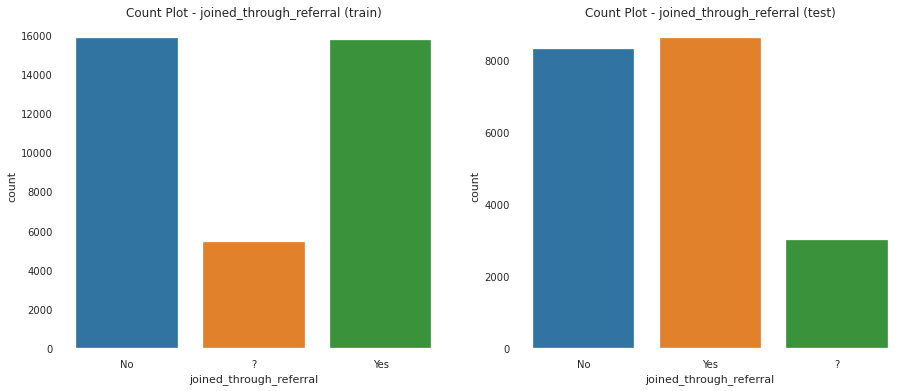

In [28]:
_, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.countplot(x='joined_through_referral', data=train_df, ax=ax[0]); ax[0].title.set_text('Count Plot - joined_through_referral (train)');
sns.countplot(x='joined_through_referral', data=test_df, ax=ax[1]); ax[1].title.set_text('Count Plot - joined_through_referral (test)');

### referral_id

In [29]:
train_df['referral_mask'] = train_df['referral_id'].apply(lambda x: 'Yes' if x=='xxxxxxxx' else 'No referral' if x=='No referral' else 'No')
test_df['referral_mask'] = test_df['referral_id'].apply(lambda x: 'Yes' if x=='xxxxxxxx' else 'No referral' if x=='No referral' else 'No')

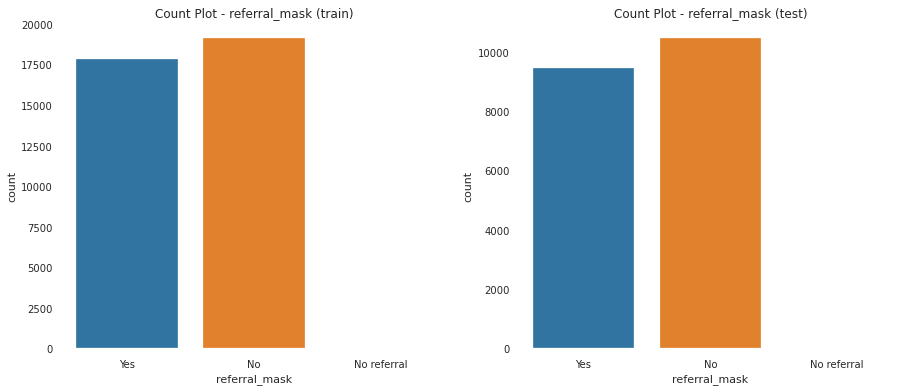

In [30]:
_, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.countplot(x='referral_mask', data=train_df, ax=ax[0]); ax[0].title.set_text('Count Plot - referral_mask (train)');
sns.countplot(x='referral_mask', data=test_df, ax=ax[1]); ax[1].title.set_text('Count Plot - referral_mask (test)');

In [31]:
train_df.groupby(['referral_mask']).size().reset_index().rename(columns={0:'count'})

,referral_mask,count
0,No,19141
1,No referral,5
2,Yes,17846


In [32]:
test_df.groupby(['referral_mask']).size().reset_index().rename(columns={0:'count'})

,referral_mask,count
0,No,10464
1,No referral,1
2,Yes,9454


### preferred_offer_types

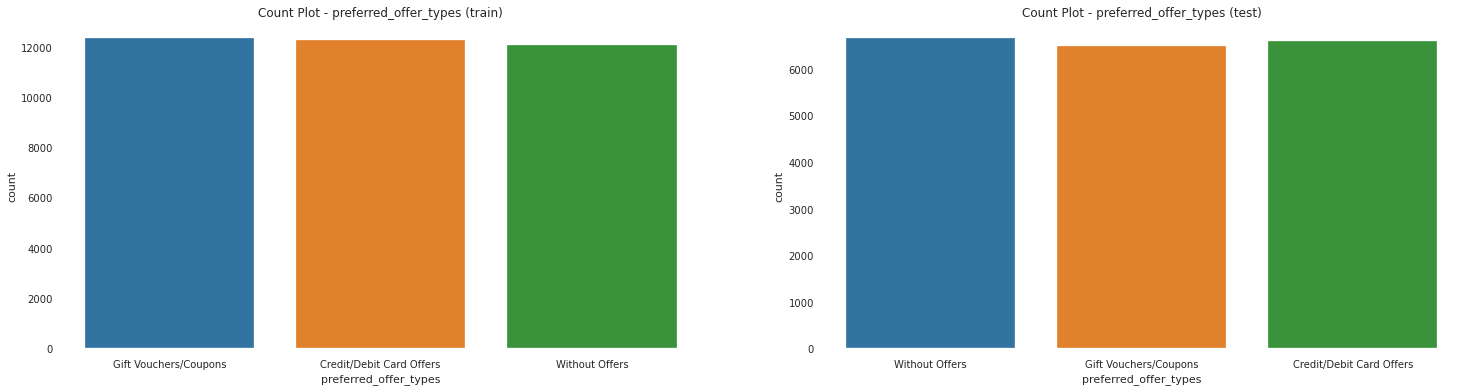

In [33]:
_, ax = plt.subplots(1, 2, figsize=(25, 6))
sns.countplot(x='preferred_offer_types', data=train_df, ax=ax[0]); ax[0].title.set_text('Count Plot - preferred_offer_types (train)');
sns.countplot(x='preferred_offer_types', data=test_df, ax=ax[1]); ax[1].title.set_text('Count Plot - preferred_offer_types (test)');

### medium_of_operation

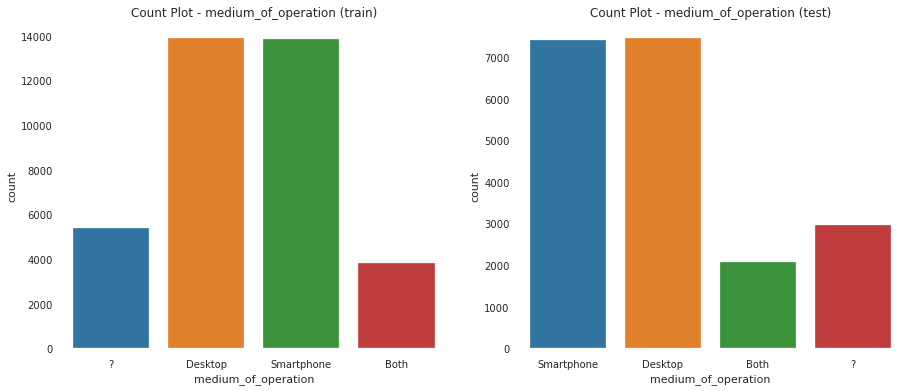

In [34]:
_, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.countplot(x='medium_of_operation', data=train_df, ax=ax[0]); ax[0].title.set_text('Count Plot - medium_of_operation (train)');
sns.countplot(x='medium_of_operation', data=test_df, ax=ax[1]); ax[1].title.set_text('Count Plot - medium_of_operation (test)');

### internet_option

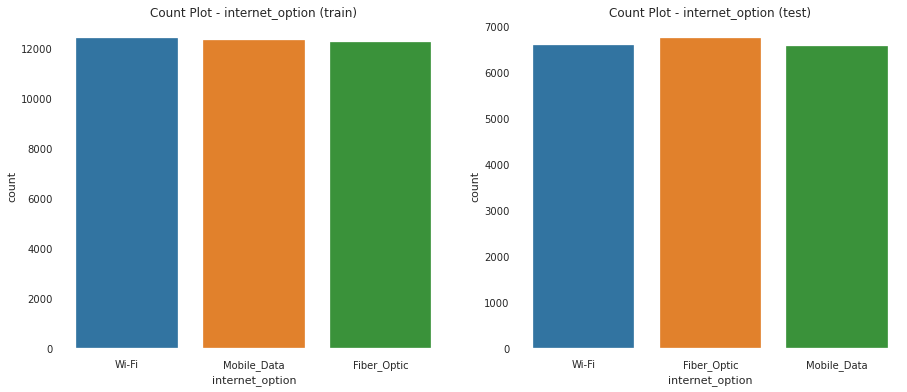

In [35]:
_, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.countplot(x='internet_option', data=train_df, ax=ax[0]); ax[0].title.set_text('Count Plot - internet_option (train)');
sns.countplot(x='internet_option', data=test_df, ax=ax[1]); ax[1].title.set_text('Count Plot - internet_option (test)');

### last_visit_time

In [36]:
train_df['lst_visit_hour'] = train_df['last_visit_time'].map(lambda x: pd.to_datetime(x, format='%H:%M:%S').hour)
train_df['lst_visit_minute'] = train_df['last_visit_time'].map(lambda x: pd.to_datetime(x, format='%H:%M:%S').minute)
train_df['lst_visit_second'] = train_df['last_visit_time'].map(lambda x: pd.to_datetime(x, format='%H:%M:%S').second)

test_df['lst_visit_hour'] = test_df['last_visit_time'].map(lambda x: pd.to_datetime(x, format='%H:%M:%S').hour)
test_df['lst_visit_minute'] = test_df['last_visit_time'].map(lambda x: pd.to_datetime(x, format='%H:%M:%S').minute)
test_df['lst_visit_second'] = test_df['last_visit_time'].map(lambda x: pd.to_datetime(x, format='%H:%M:%S').second)

train_df['lst_visit_hour'] = train_df['lst_visit_hour'].astype(str)
train_df['lst_visit_minute'] = train_df['lst_visit_minute'].astype(str)
train_df['lst_visit_second'] = train_df['lst_visit_second'].astype(str)

test_df['lst_visit_hour'] = test_df['lst_visit_hour'].astype(str)
test_df['lst_visit_minute'] = test_df['lst_visit_minute'].astype(str)
test_df['lst_visit_second'] = test_df['lst_visit_second'].astype(str)

### days_since_last_login

**Note**: days_since_last_login values can be bucketed into below groups

* -999 --> No activity
* days <= 10
* days between 11 and 20
* days > 20

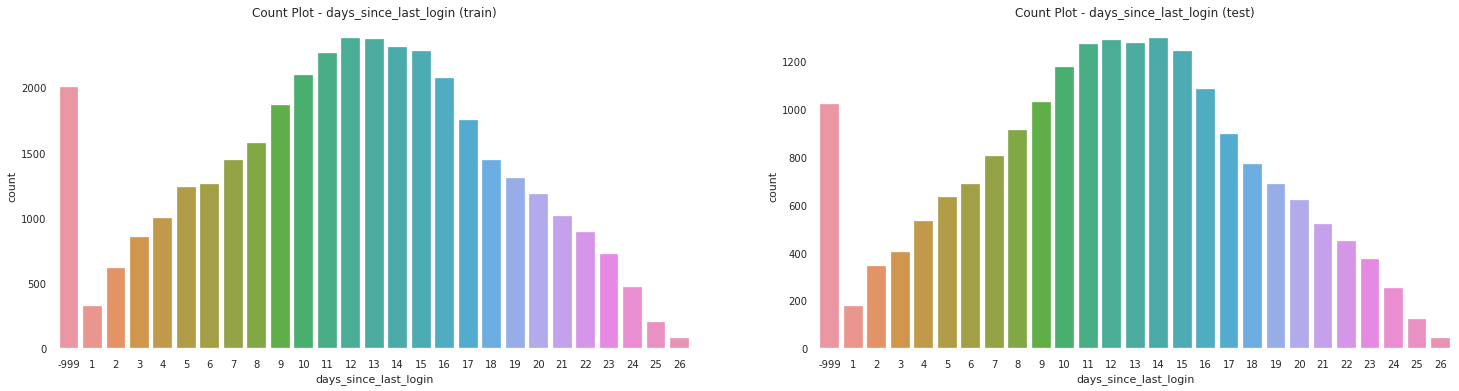

In [37]:
_, ax = plt.subplots(1, 2, figsize=(25, 6))
sns.countplot(x='days_since_last_login', data=train_df, ax=ax[0]); ax[0].title.set_text('Count Plot - days_since_last_login (train)');
sns.countplot(x='days_since_last_login', data=test_df, ax=ax[1]); ax[1].title.set_text('Count Plot - days_since_last_login (test)');

In [38]:
def last_login_bins(x):
    if x == -999:
        return '-999'
    elif x > 0 and x <= 10:
        return '>0 & <=10'
    elif x > 10 and x <= 20:
        return '>10 & <=20'
    elif x > 20:
        return '>20'

train_df['last_login_category'] = train_df['days_since_last_login'].apply(last_login_bins)
test_df['last_login_category'] = test_df['days_since_last_login'].apply(last_login_bins)

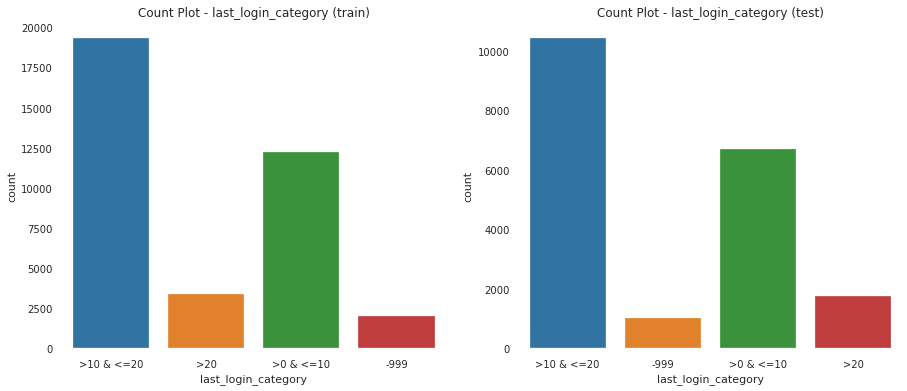

In [39]:
_, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.countplot(x='last_login_category', data=train_df, ax=ax[0]); ax[0].title.set_text('Count Plot - last_login_category (train)');
sns.countplot(x='last_login_category', data=test_df, ax=ax[1]); ax[1].title.set_text('Count Plot - last_login_category (test)');

### avg_time_spent

* Outlier present: log(abs(avg_time_spent)) < 2
* Skewed data; log-scale conversion done

In [40]:
train_df = train_df[np.log1p(np.abs(train_df['avg_time_spent'])) > 2].copy()

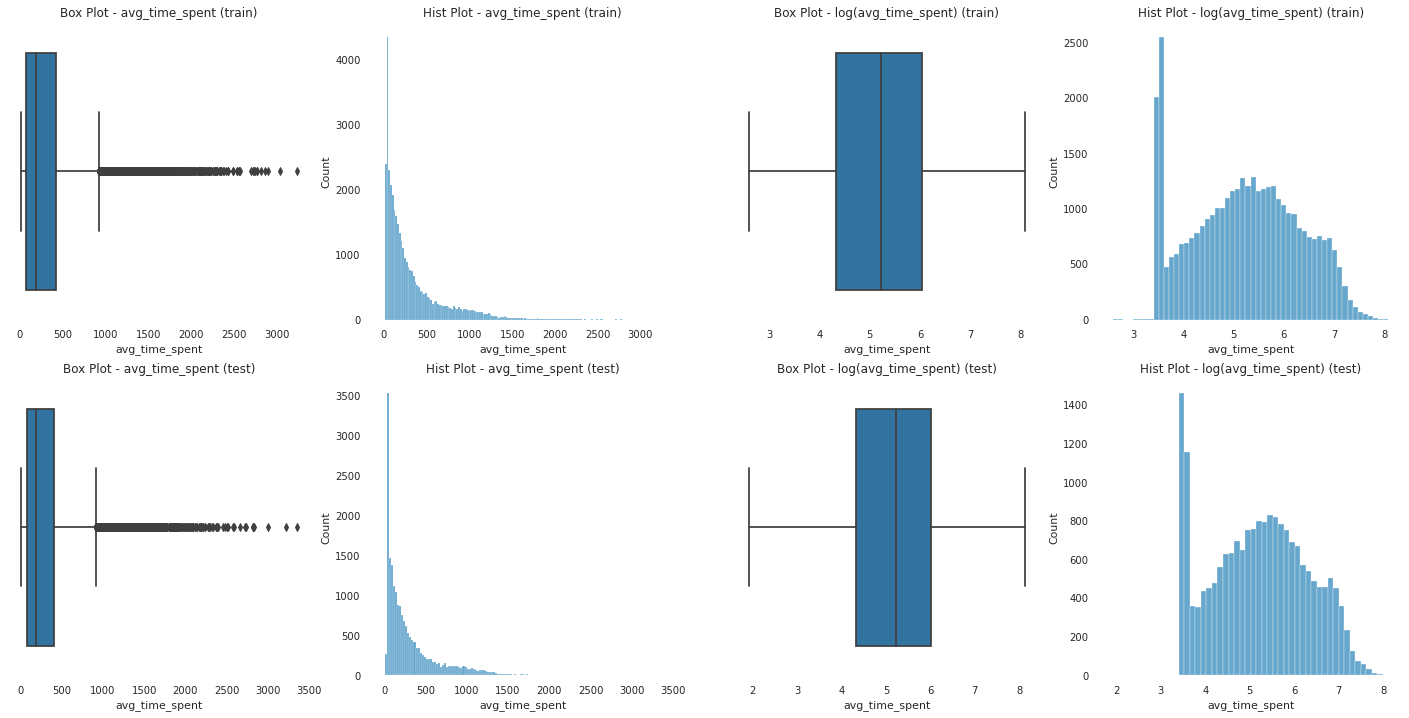

In [41]:
x1 = np.abs(train_df['avg_time_spent'])
y1 = np.log1p(x1)
x2 = np.abs(test_df['avg_time_spent'])
y2 = np.log1p(x2)

_, ax = plt.subplots(2, 4, figsize=(25, 12))
sns.boxplot(x=x1, ax=ax[0][0]); ax[0][0].title.set_text('Box Plot - avg_time_spent (train)');
sns.histplot(x=x1, ax=ax[0][1]); ax[0][1].title.set_text('Hist Plot - avg_time_spent (train)');
sns.boxplot(x=y1, ax=ax[0][2]); ax[0][2].title.set_text('Box Plot - log(avg_time_spent) (train)');
sns.histplot(x=y1, ax=ax[0][3]); ax[0][3].title.set_text('Hist Plot - log(avg_time_spent) (train)');
sns.boxplot(x=x2, ax=ax[1][0]); ax[1][0].title.set_text('Box Plot - avg_time_spent (test)');
sns.histplot(x=x2, ax=ax[1][1]); ax[1][1].title.set_text('Hist Plot - avg_time_spent (test)');
sns.boxplot(x=y2, ax=ax[1][2]); ax[1][2].title.set_text('Box Plot - log(avg_time_spent) (test)');
sns.histplot(x=y2, ax=ax[1][3]); ax[1][3].title.set_text('Hist Plot - log(avg_time_spent) (test)');

### avg_transaction_value	

* Cube-root scale conversion done to make the data more gaussian

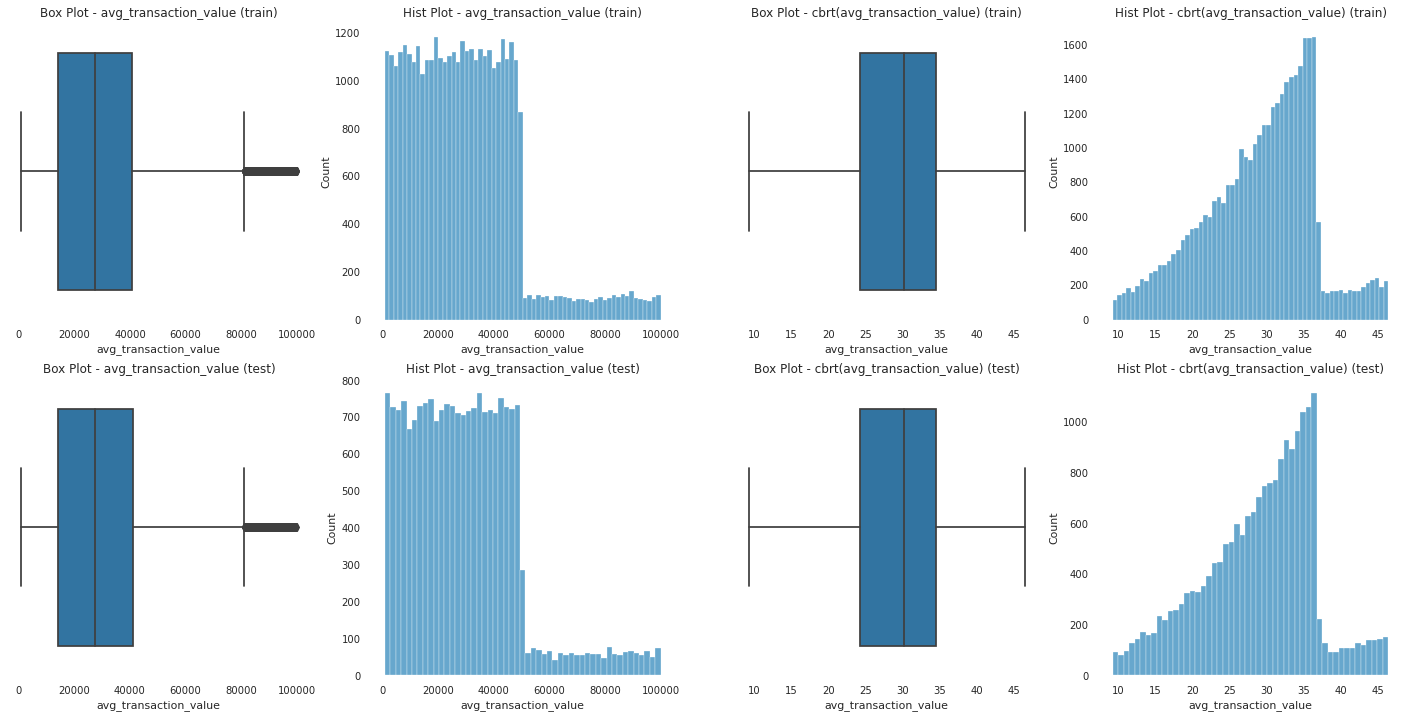

In [42]:
x1 = train_df['avg_transaction_value']
y1 = np.cbrt(x1)
x2 = test_df['avg_transaction_value']
y2 = np.cbrt(x2)

_, ax = plt.subplots(2, 4, figsize=(25, 12))
sns.boxplot(x=x1, ax=ax[0][0]); ax[0][0].title.set_text('Box Plot - avg_transaction_value (train)');
sns.histplot(x=x1, ax=ax[0][1]); ax[0][1].title.set_text('Hist Plot - avg_transaction_value (train)');
sns.boxplot(x=y1, ax=ax[0][2]); ax[0][2].title.set_text('Box Plot - cbrt(avg_transaction_value) (train)');
sns.histplot(x=y1, ax=ax[0][3]); ax[0][3].title.set_text('Hist Plot - cbrt(avg_transaction_value) (train)');
sns.boxplot(x=x2, ax=ax[1][0]); ax[1][0].title.set_text('Box Plot - avg_transaction_value (test)');
sns.histplot(x=x2, ax=ax[1][1]); ax[1][1].title.set_text('Hist Plot - avg_transaction_value (test)');
sns.boxplot(x=y2, ax=ax[1][2]); ax[1][2].title.set_text('Box Plot - cbrt(avg_transaction_value) (test)');
sns.histplot(x=y2, ax=ax[1][3]); ax[1][3].title.set_text('Hist Plot - cbrt(avg_transaction_value) (test)');

### avg_frequency_login_days

* 'Error' value can be imputed using MICE
* Scale-conversion needed as lot of outliers present

In [43]:
train_df['avg_frequency_login_days'] = train_df['avg_frequency_login_days'].apply(lambda x: float(x) if x!='Error' else np.nan)
test_df['avg_frequency_login_days'] = test_df['avg_frequency_login_days'].apply(lambda x: float(x) if x!='Error' else np.nan)

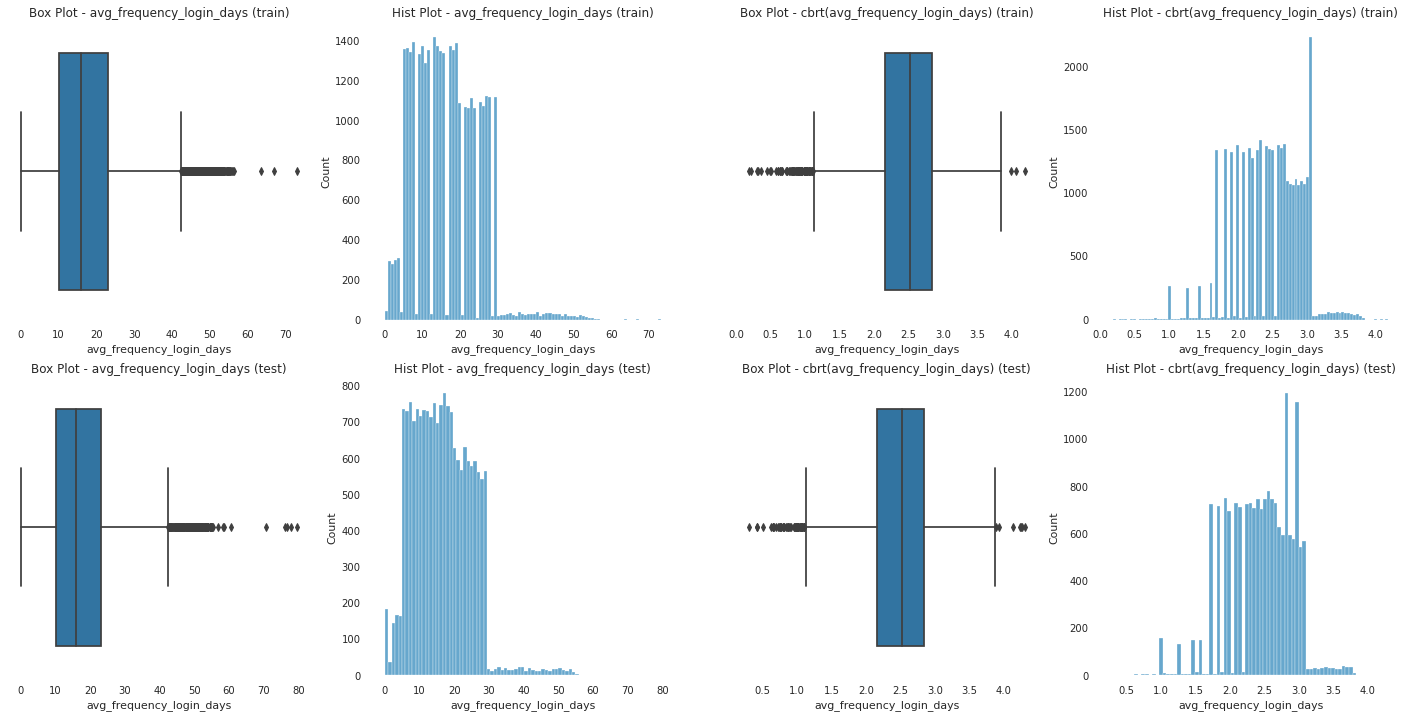

In [44]:
x1 = np.abs(train_df['avg_frequency_login_days'])
y1 = np.cbrt(x1)
x2 = np.abs(test_df['avg_frequency_login_days'])
y2 = np.cbrt(x2)

_, ax = plt.subplots(2, 4, figsize=(25, 12))
sns.boxplot(x=x1, ax=ax[0][0]); ax[0][0].title.set_text('Box Plot - avg_frequency_login_days (train)');
sns.histplot(x=x1, ax=ax[0][1]); ax[0][1].title.set_text('Hist Plot - avg_frequency_login_days (train)');
sns.boxplot(x=y1, ax=ax[0][2]); ax[0][2].title.set_text('Box Plot - cbrt(avg_frequency_login_days) (train)');
sns.histplot(x=y1, ax=ax[0][3]); ax[0][3].title.set_text('Hist Plot - cbrt(avg_frequency_login_days) (train)');
sns.boxplot(x=x2, ax=ax[1][0]); ax[1][0].title.set_text('Box Plot - avg_frequency_login_days (test)');
sns.histplot(x=x2, ax=ax[1][1]); ax[1][1].title.set_text('Hist Plot - avg_frequency_login_days (test)');
sns.boxplot(x=y2, ax=ax[1][2]); ax[1][2].title.set_text('Box Plot - cbrt(avg_frequency_login_days) (test)');
sns.histplot(x=y2, ax=ax[1][3]); ax[1][3].title.set_text('Hist Plot - cbrt(avg_frequency_login_days) (test)');

### points_in_wallet

* NaN values to be imputed using MICE
* Scale conversion needed as data is skewed

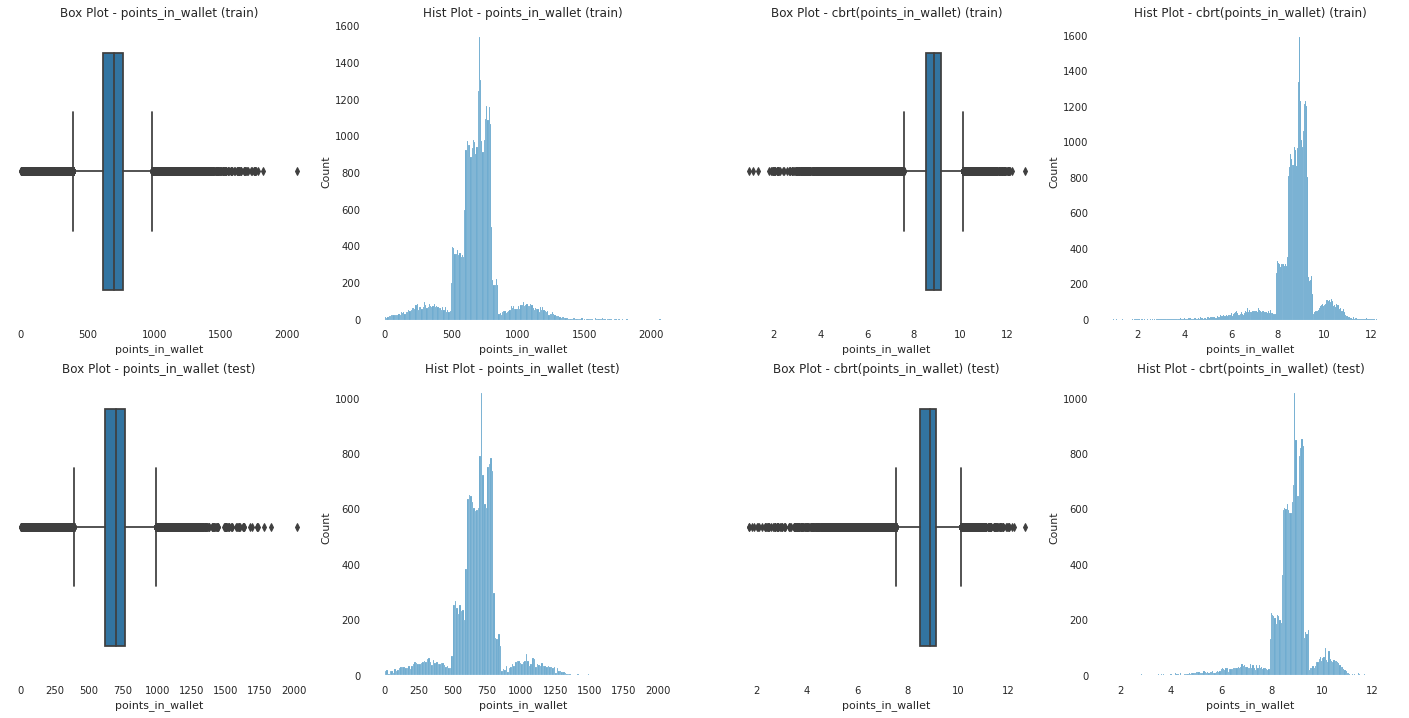

In [45]:
x1 = np.abs(train_df['points_in_wallet'])
y1 = np.cbrt(x1)
x2 = np.abs(test_df['points_in_wallet'])
y2 = np.cbrt(x2)

_, ax = plt.subplots(2, 4, figsize=(25, 12))
sns.boxplot(x=x1, ax=ax[0][0]); ax[0][0].title.set_text('Box Plot - points_in_wallet (train)');
sns.histplot(x=x1, ax=ax[0][1]); ax[0][1].title.set_text('Hist Plot - points_in_wallet (train)');
sns.boxplot(x=y1, ax=ax[0][2]); ax[0][2].title.set_text('Box Plot - cbrt(points_in_wallet) (train)');
sns.histplot(x=y1, ax=ax[0][3]); ax[0][3].title.set_text('Hist Plot - cbrt(points_in_wallet) (train)');
sns.boxplot(x=x2, ax=ax[1][0]); ax[1][0].title.set_text('Box Plot - points_in_wallet (test)');
sns.histplot(x=x2, ax=ax[1][1]); ax[1][1].title.set_text('Hist Plot - points_in_wallet (test)');
sns.boxplot(x=y2, ax=ax[1][2]); ax[1][2].title.set_text('Box Plot - cbrt(points_in_wallet) (test)');
sns.histplot(x=y2, ax=ax[1][3]); ax[1][3].title.set_text('Hist Plot - cbrt(points_in_wallet) (test)');

### used_special_discount

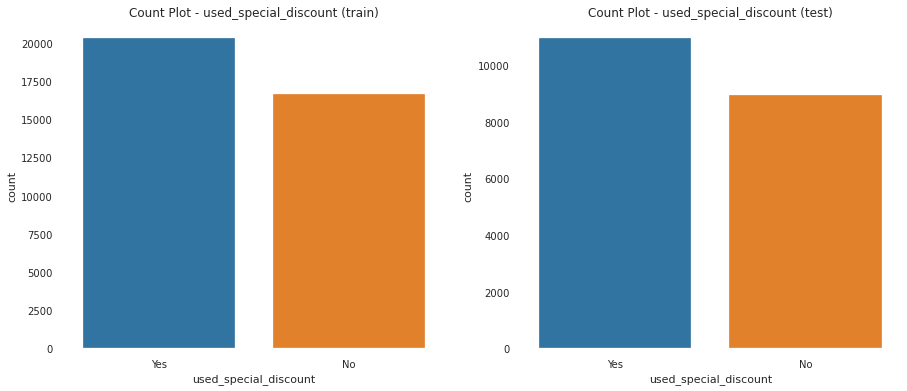

In [46]:
_, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.countplot(x='used_special_discount', data=train_df, ax=ax[0]); ax[0].title.set_text('Count Plot - used_special_discount (train)');
sns.countplot(x='used_special_discount', data=test_df, ax=ax[1]); ax[1].title.set_text('Count Plot - used_special_discount (test)');

### offer_application_preference

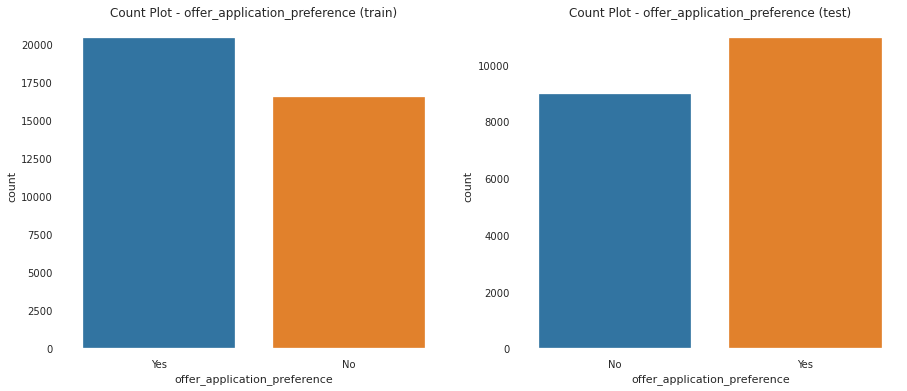

In [47]:
_, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.countplot(x='offer_application_preference', data=train_df, ax=ax[0]); ax[0].title.set_text('Count Plot - offer_application_preference (train)');
sns.countplot(x='offer_application_preference', data=test_df, ax=ax[1]); ax[1].title.set_text('Count Plot - offer_application_preference (test)');

### past_complaint

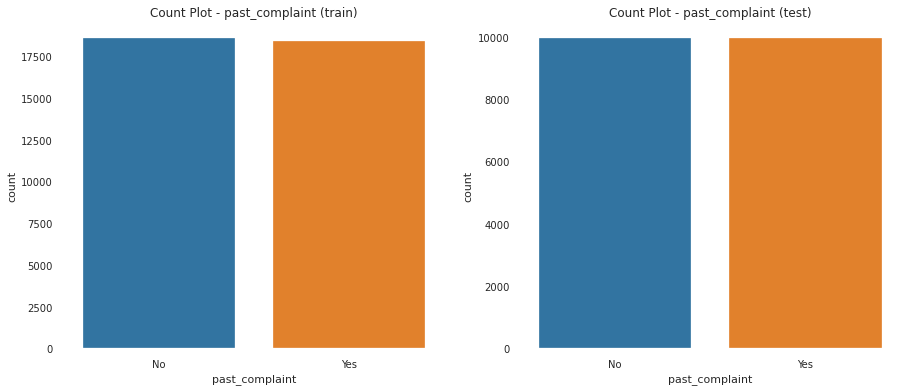

In [48]:
_, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.countplot(x='past_complaint', data=train_df, ax=ax[0]); ax[0].title.set_text('Count Plot - past_complaint (train)');
sns.countplot(x='past_complaint', data=test_df, ax=ax[1]); ax[1].title.set_text('Count Plot - past_complaint (test)');

### complaint_status

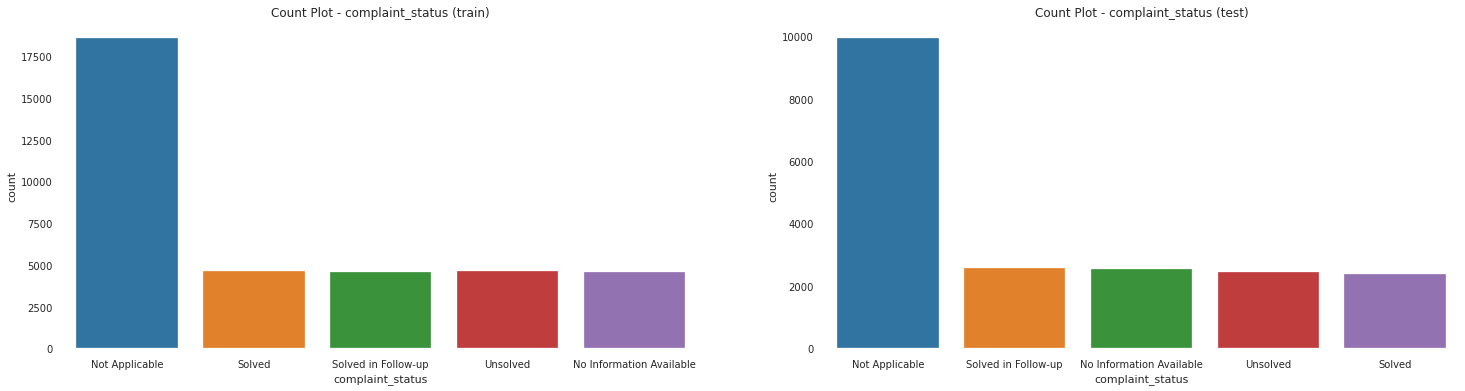

In [49]:
_, ax = plt.subplots(1, 2, figsize=(25, 6))
sns.countplot(x='complaint_status', data=train_df, ax=ax[0]); ax[0].title.set_text('Count Plot - complaint_status (train)');
sns.countplot(x='complaint_status', data=test_df, ax=ax[1]); ax[1].title.set_text('Count Plot - complaint_status (test)');

### feedback

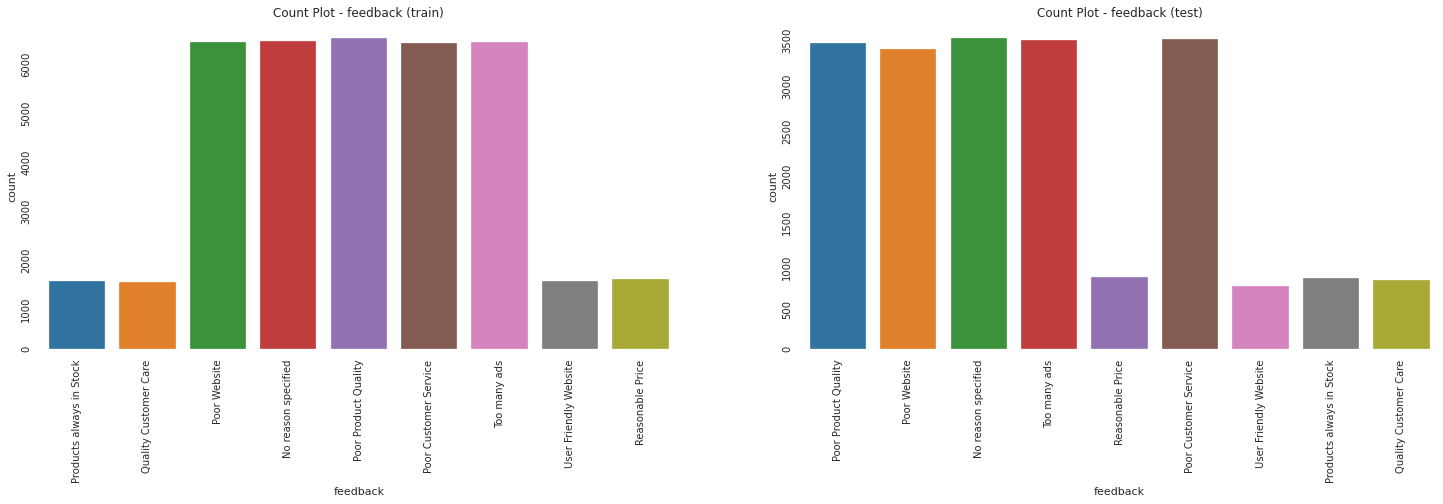

In [50]:
_, ax = plt.subplots(1, 2, figsize=(25, 6))
sns.countplot(x='feedback', data=train_df, ax=ax[0]); ax[0].title.set_text('Count Plot - feedback (train)');
sns.countplot(x='feedback', data=test_df, ax=ax[1]); ax[1].title.set_text('Count Plot - feedback (test)');
ax[0].tick_params(labelrotation=90)
ax[1].tick_params(labelrotation=90)

## Target label EDA

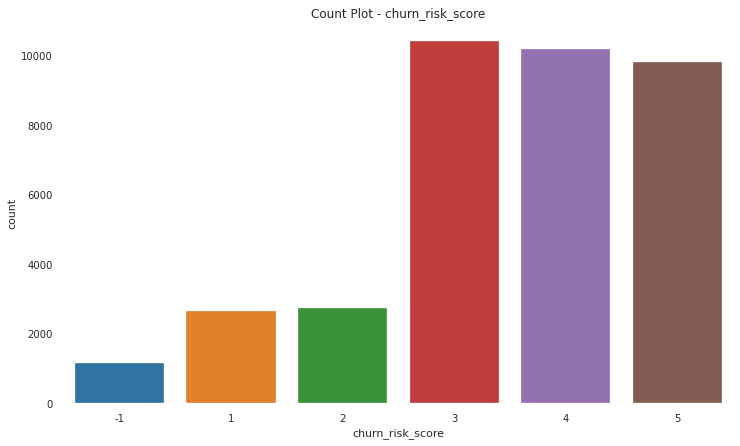

In [51]:
plt.figure(figsize=(12,7))
sns.countplot(x='churn_risk_score', data=train_df); 
plt.title('Count Plot - churn_risk_score');

In [52]:
train_df.drop(['customer_id','joining_date','referral_id','last_visit_time'], axis=1, inplace=True)
test_df.drop(['customer_id','joining_date','referral_id','last_visit_time'], axis=1, inplace=True)

## Sweetviz EDA

In [53]:
report=sv.analyze(train_df)
report.show_html('Sweetviz_EDA_Report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Sweetviz_EDA_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [54]:
report_comp=sv.compare([train_df,'TRAIN'],[test_df,'TEST']) 
report_comp.show_html('Sweetviz_Compare_Report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Sweetviz_Compare_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Pandas Profiling EDA

In [55]:
design_report = ProfileReport(train_df, title='Pandas Profiling Report', explorative=True)
design_report.to_file(output_file='Pandas_Profiling_Report.html')

Summarize dataset:   0%|          | 0/52 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

/opt/conda/lib/python3.7/site-packages/pandas_profiling/visualisation/plot.py:154: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Features Correlation

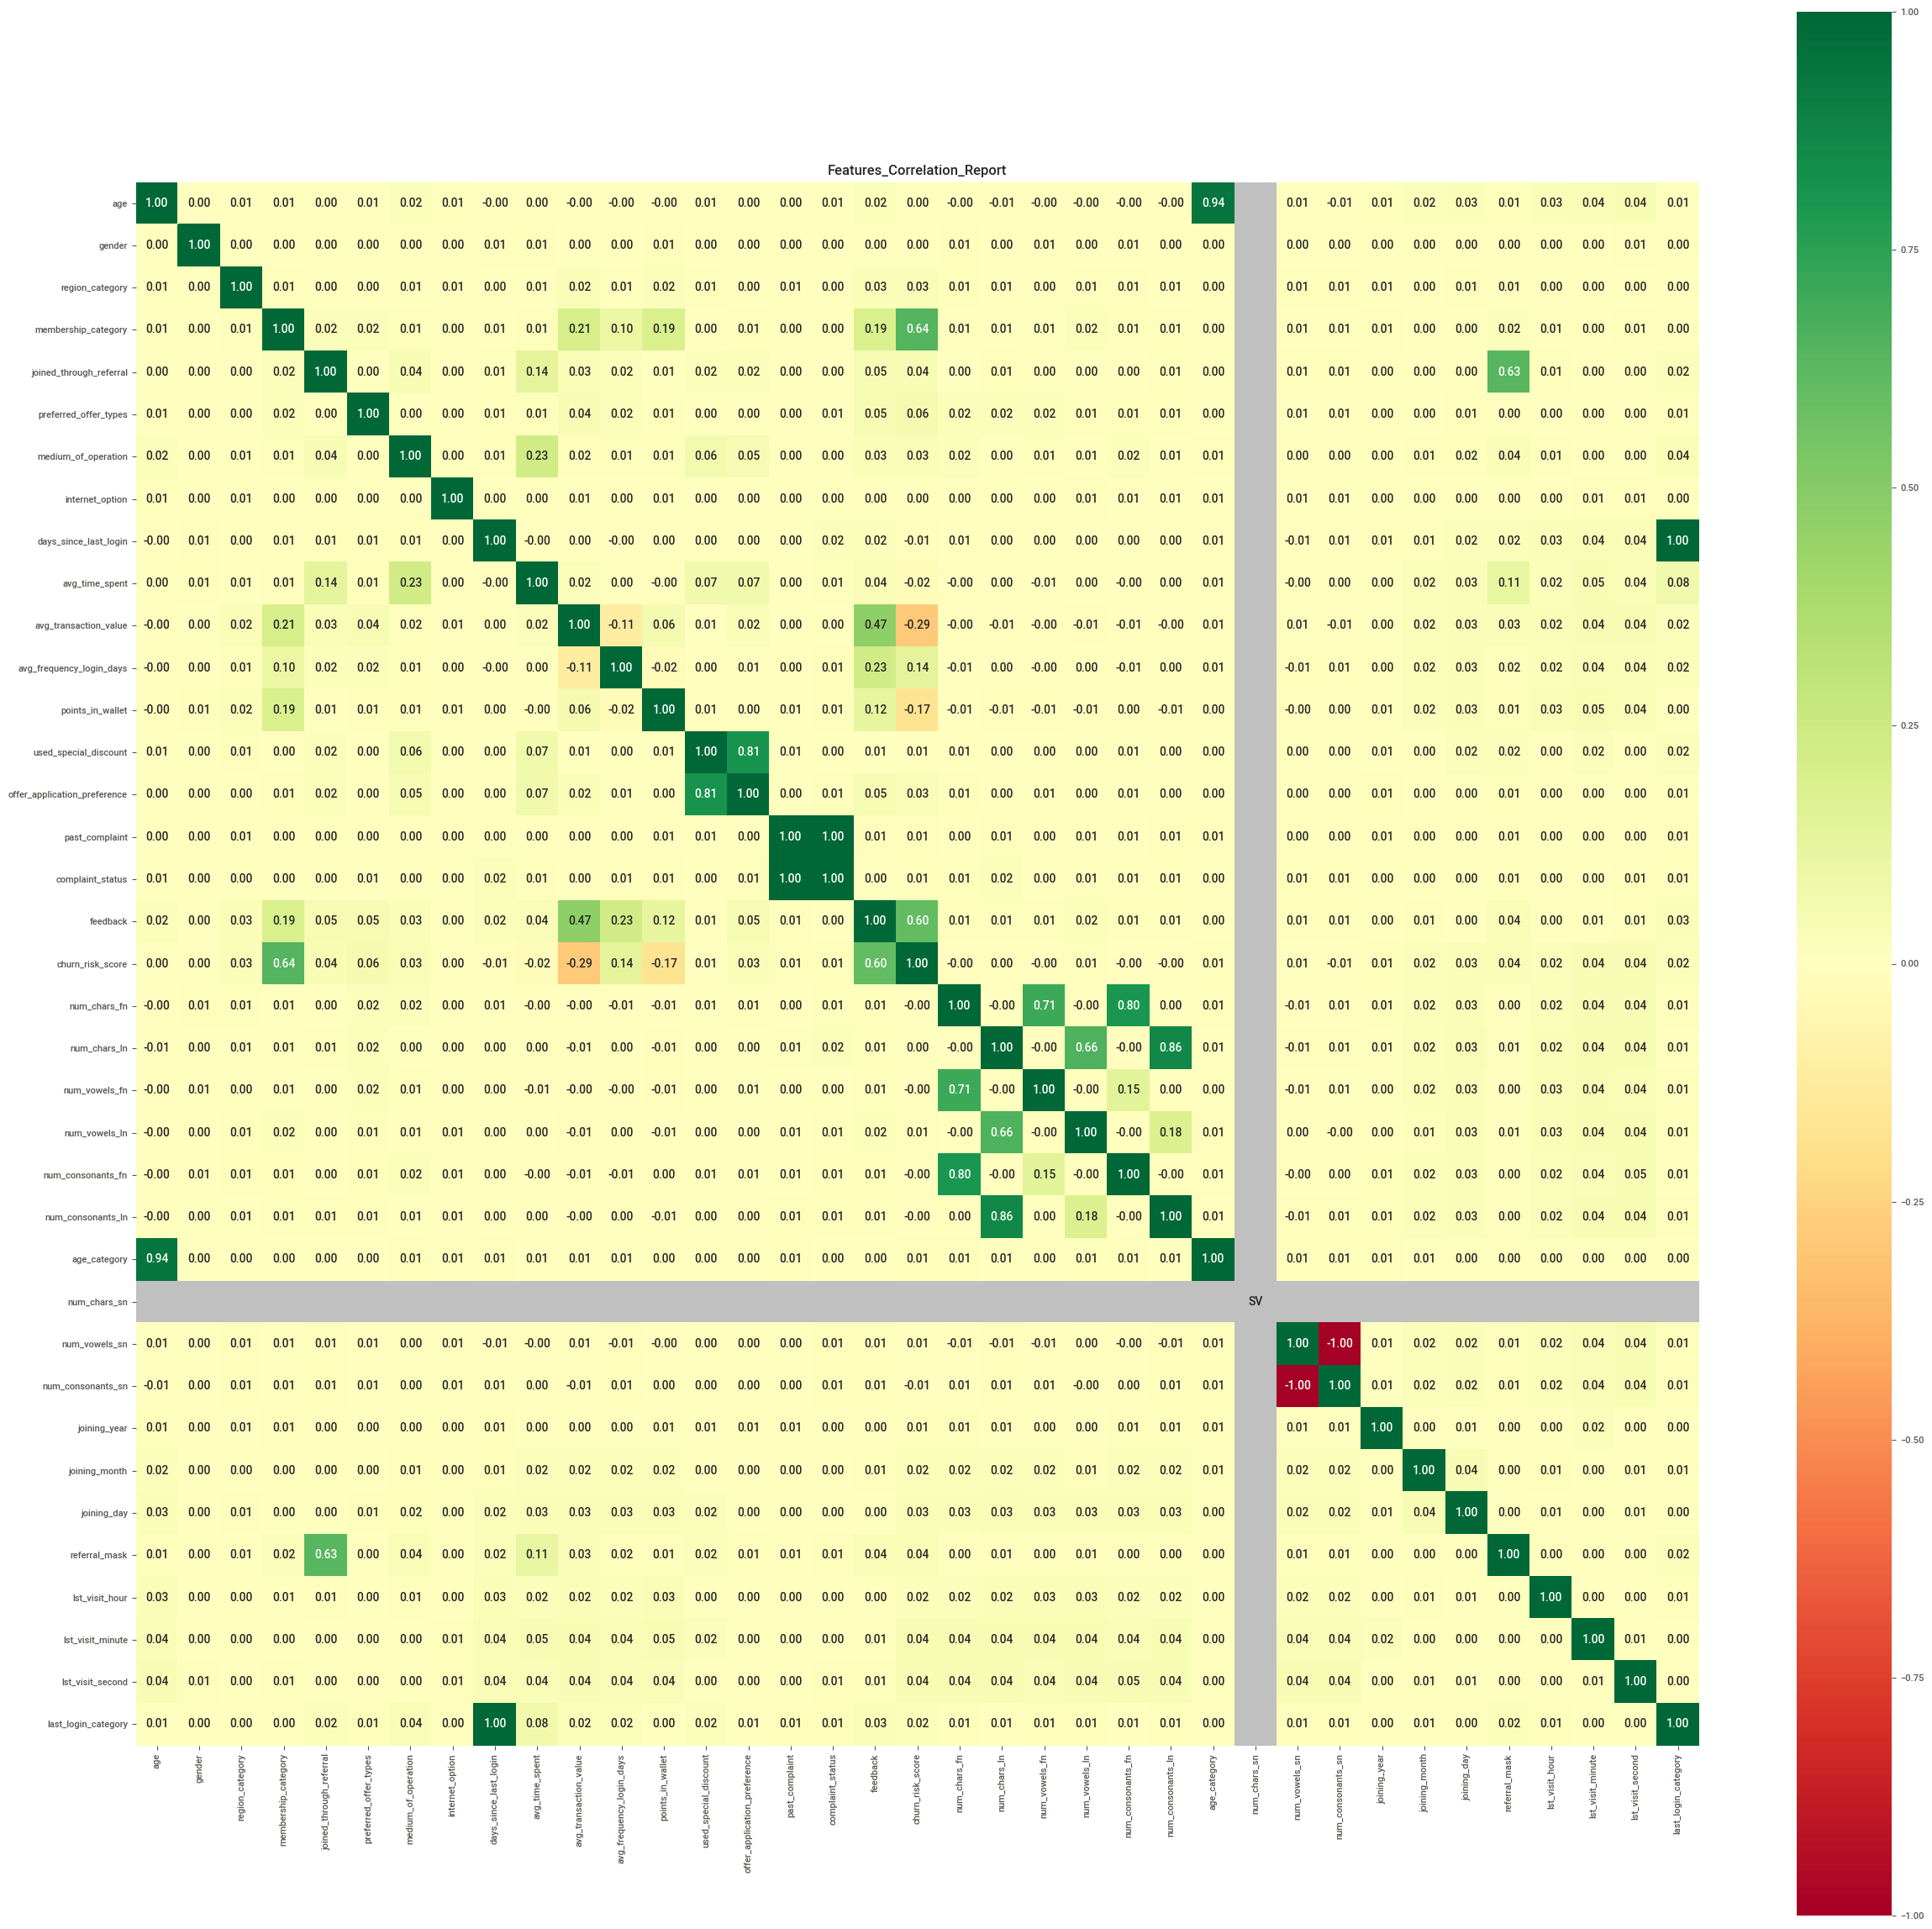

{'corr':                                    age    gender  region_category  \
 age                           1.000000  0.002284         0.006201   
 gender                        0.002284  1.000000         0.000000   
 region_category               0.006201  0.000000         1.000000   
 membership_category           0.006520  0.000000         0.011609   
 joined_through_referral       0.002178  0.000000         0.000000   
 preferred_offer_types         0.007732  0.002806         0.000000   
 medium_of_operation           0.016522  0.002203         0.007158   
 internet_option               0.011443  0.000000         0.006579   
 days_since_last_login        -0.003978  0.010782         0.002663   
 avg_time_spent                0.001550  0.012082         0.005653   
 avg_transaction_value        -0.000482  0.003984         0.023631   
 avg_frequency_login_days     -0.002422  0.003677         0.013888   
 points_in_wallet             -0.001216  0.010870         0.018696   
 used_specia

In [56]:
associations(train_df, figsize=(30,30), cmap="RdYlGn", 
             title='Features_Correlation_Report', 
             filename='Features_Correlation_Report.png')